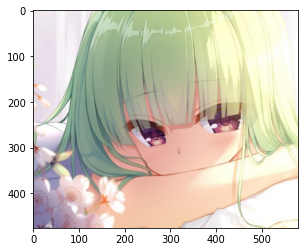

D:\Python\Python38\lib\site-packages\torchvision\transforms\functional.py:74: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


In [3]:
import cv2
import matplotlib.pyplot as plot
from torch.nn import functional as F
import torch
import numpy as np
import PIL.Image as Image
import math
import torchvision.transforms as transforms

#经典只用plt读取（ndarray），plt显示
img=plot.imread("murasame.jpg")
plot.imshow(img)
plot.show()

#经典cv2读取(ndarray)，matplotlib显示.(cv2不适合展示)
# img = cv2.imread('./murasame.jpg', 1)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plot.imshow(img)
# plot.show()

#非经典PIL读取(PIL类型)，matplotlib显示（pil不适合展示）
# img=Image.open("murasame.jpg")
# plot.imshow(img)
# plot.show()

# # cv2->hwc pytorch->chw pil->hwc
# 这一句就等于下一句！！！！！自带转换为CHW和转换为（0，1）
img=transforms.ToTensor()(img)
# img = torch.tensor(img.transpose((2,0,1))/255,dtype=torch.float)

## translation

D:\Python\Python38\lib\site-packages\torch\nn\functional.py:3448: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
D:\Python\Python38\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


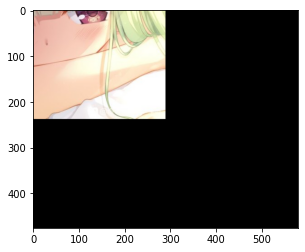

In [4]:
# affine_grid默认坐标为左上角-1 -1右下角1 1；即以中心为原点
# 所以下面的平移变换，x+1 y+1就是左上角移动一半了。
theta = torch.tensor([
    [1,0,1],
    [0,1,1]
], dtype=torch.float)
# affine_grid,给定一组仿射变换，输出2d或3d光流场（grid）
# 输入为 n c h w 或者 n c d h w
grid = F.affine_grid(theta.unsqueeze(0), img.unsqueeze(0).size()) 
output = F.grid_sample(img.unsqueeze(0), grid) #两个参数分别为n c h w && n h w 2，输出n c h w
plot.imshow(output[0].numpy().transpose(1,2,0))
plot.show()

## （resize）

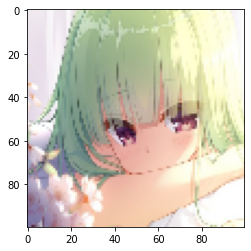

In [5]:
theta = torch.tensor([
    [1,0,0],
    [0,1,0]
], dtype=torch.float)
grid = F.affine_grid(theta.unsqueeze(0), torch.Size([1, 3, 100, 100])) #就是调节affine_grid的size参数
output = F.grid_sample(img.unsqueeze(0), grid) 
plot.imshow(output[0].numpy().transpose(1,2,0))
plot.show()

## scaling

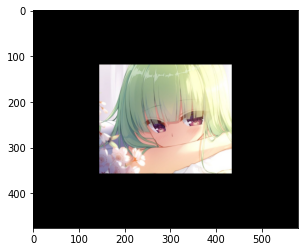

In [6]:
theta = torch.tensor([
    [2,0,0],
    [0,2,0]
], dtype=torch.float)
grid = F.affine_grid(theta.unsqueeze(0), img.unsqueeze(0).size()) 
output = F.grid_sample(img.unsqueeze(0), grid) # 注意缩放需要插值的！默认mode="bilinear" 
plot.imshow(output[0].numpy().transpose(1,2,0))
plot.show()

## rotation

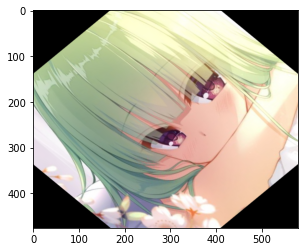

In [7]:
angle=45*math.pi/180
theta = torch.tensor([ #注意他这个旋转其实有变形的，边角不是90度了。并且注意旋转也是要插值的！毕竟电脑不是大白纸能随便旋转
    [math.cos(angle),math.sin(-angle),0],
    [math.sin(angle),math.cos(-angle),0]
], dtype=torch.float)
grid = F.affine_grid(theta.unsqueeze(0), img.unsqueeze(0).size()) 
output = F.grid_sample(img.unsqueeze(0), grid) 
plot.imshow(output[0].numpy().transpose(1,2,0))
plot.show()

## shear

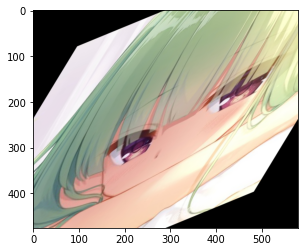

In [54]:
theta = torch.tensor([
    [1,0.5,0],
    [0.5,1,0]
], dtype=torch.float)
grid = F.affine_grid(theta.unsqueeze(0), img.unsqueeze(0).size()) 
output = F.grid_sample(img.unsqueeze(0), grid) # 显然也是要插值的
plot.imshow(output[0].numpy().transpose(1,2,0))
plot.show()

## （mirror）

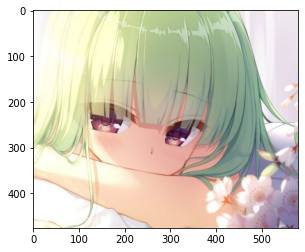

In [65]:
theta = torch.tensor([
    [-1,0,0],
    [0,1,0]
], dtype=torch.float)
grid = F.affine_grid(theta.unsqueeze(0), img.unsqueeze(0).size()) 
output = F.grid_sample(img.unsqueeze(0), grid) # 显然也是要插值的
plot.imshow(output[0].numpy().transpose(1,2,0))
plot.show()

## （转置）

D:\Python\Python38\lib\site-packages\torch\nn\functional.py:3448: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
D:\Python\Python38\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


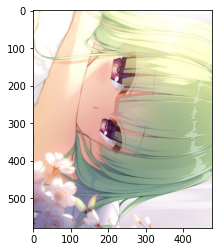

In [66]:
theta = torch.tensor([
    [0,-1,0],
    [-1,0,0]
], dtype=torch.float)
n,c,h,w=img.unsqueeze(0).size()
grid = F.affine_grid(theta.unsqueeze(0), (n,c,w,h)) 
output = F.grid_sample(img.unsqueeze(0), grid) # 显然也是要插值的
plot.imshow(output[0].numpy().transpose(1,2,0))
plot.show()